In [1]:
from optparse import OptionParser
import json
import os
import pickle
import random
import re
import pandas as pd
import pysam
# import h5py
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from skimage.filters import threshold_li, threshold_otsu

In [5]:
explained_path = "./all_explained_boundaries.tsv"
unexplained_path = "./all_unexplained_boundaries.tsv"

In [6]:
explained_tads = pd.read_csv(explained_path, sep="\t", index_col=None)
unexplained_tads = pd.read_csv(unexplained_path, sep="\t", index_col=None)

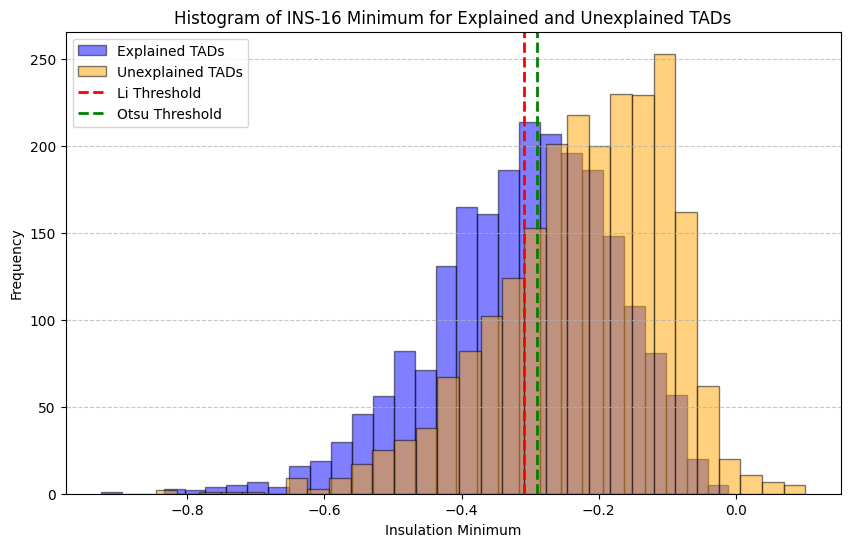

In [7]:
# Assuming explained_tads and unexplained_tads DataFrames have a column 'miss_per'
plt.figure(figsize=(10, 6))

# Plotting the histogram for explained_tads
plt.hist(explained_tads['ins16_min'], bins=30, alpha=0.5, label='Explained TADs', color='blue', edgecolor='black')

# Plotting the histogram for unexplained_tads
plt.hist(unexplained_tads['ins16_min'], bins=30, alpha=0.5, label='Unexplained TADs', color='orange', edgecolor='black')

thresholds_li = threshold_li(pd.concat([explained_tads['ins16_min'], unexplained_tads['ins16_min']]).values)
thresholds_otsu = threshold_otsu(pd.concat([explained_tads['ins16_min'], unexplained_tads['ins16_min']]).values)

plt.axvline(thresholds_li, color='red', linestyle='dashed', linewidth=2, label='Li Threshold')
plt.axvline(thresholds_otsu, color='green', linestyle='dashed', linewidth=2, label='Otsu Threshold')

# Adding labels and title
plt.xlabel('Insulation Minimum')
plt.ylabel('Frequency')
plt.title('Histogram of INS-16 Minimum for Explained and Unexplained TADs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.savefig("./plots/insulation_assessment.pdf", format="pdf")

# Show the plot
plt.show()

In [8]:
percentage = (len(unexplained_tads[unexplained_tads['ins16_min'] > thresholds_li]) / len(unexplained_tads))*100
print(f"predicted insulation (INS-16) minimum of {round(percentage,2)}% unexplained TADs is higher than {round(thresholds_li,2)}")

predicted insulation (INS-16) minimum of 77.33% unexplained TADs is higher than -0.31


In [9]:
len(unexplained_tads[unexplained_tads['ins16_min'] > thresholds_li])

1750

In [10]:
len(unexplained_tads[unexplained_tads['ins16_min'] > thresholds_otsu])

1657

In [10]:
tss_annotations = pd.read_csv("/scratch1/smaruj/reftss.mm10.basic.homer.annotations.txt", sep="\t")

In [11]:
tss_annotations = tss_annotations.rename(columns={"Chr": "chrom", "Start": "start", "End": "end"})

In [12]:
tss_locations = tss_annotations[["chrom", "start", "end"]]

In [ ]:
# tss_annotations
# Chr, Start, End

In [13]:
import bioframe as bf

In [14]:
df_overlap_unexplained = bf.overlap(
    unexplained_tads, tss_locations, suffixes=("", "_2"), return_index=False, how="inner"
)

In [15]:
len(df_overlap_unexplained[["chrom", "start", "end"]].drop_duplicates())

828

In [16]:
df_overlap_explained = bf.overlap(
    explained_tads, tss_locations, suffixes=("", "_2"), return_index=False, how="inner"
)

In [17]:
len(df_overlap_explained[["chrom", "start", "end"]].drop_duplicates())

751